In [3]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM

In [12]:
rainfall_data = pd.read_csv("/Users/prudhvi/Desktop/time_series_analysis/data/All_India_Area_Weighted_Monthly_Rainfall.csv")


In [15]:

def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rainfall_data['Value'] = scaler.fit_transform(np.array(rainfall_data['Value']).reshape(-1, 1))

In [32]:
len(X)

1346

In [33]:
X,y = makeXy(rainfall_data['Value'],10)

X_train = X[:1100]
X_test = X[1100:]
y_train = y[:1100]
y_test = y[1100:]

In [34]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [45]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape = (X_train.shape[1],1), return_sequences=True, activation = 'relu'))
lstm_model.add(Dropout(0.1))
lstm_model.add(LSTM(50,activation='relu'))
lstm_model.add(Dropout(0.1))
lstm_model.add(Dense(1))
lstm_model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = ['mse'])
lstm_model.fit(X_train, y_train, 
    nb_epoch=50, batch_size=50,validation_split=0.2)

Train on 880 samples, validate on 220 samples
Epoch 1/50
880/880 [==============================] - 1s - loss: 0.1259 - mean_squared_error: 0.1259 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 2/50
880/880 [==============================] - 1s - loss: 0.0771 - mean_squared_error: 0.0771 - val_loss: 0.0606 - val_mean_squared_error: 0.0606
Epoch 3/50
880/880 [==============================] - 1s - loss: 0.0539 - mean_squared_error: 0.0539 - val_loss: 0.0347 - val_mean_squared_error: 0.0347
Epoch 4/50
880/880 [==============================] - 1s - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 5/50
880/880 [==============================] - 1s - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 6/50
880/880 [==============================] - 1s - loss: 0.0117 - mean_squared_error: 0.0117 - val_loss: 0.0066 - val_mean_squared_error: 0.0066
Epoch 7/50
880/880 [================

In [46]:
preds = lstm_model.predict(X_test)

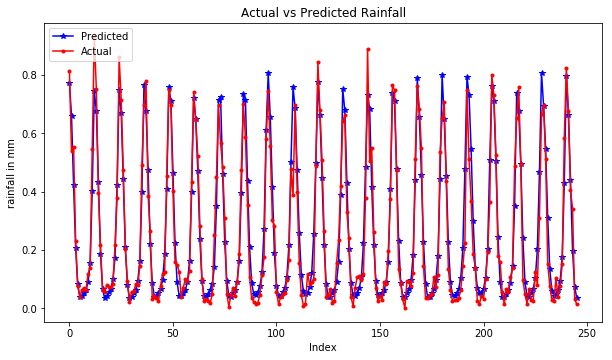

In [47]:
plt.figure(figsize=(10, 5.5))
plt.plot(preds,linestyle='-', marker='*',color='b')
plt.plot(y_test,linestyle='-', marker='.',color='r')
plt.legend(['Predicted','Actual'], loc=2)
plt.title('Actual vs Predicted Rainfall')
plt.ylabel('rainfall in mm')
plt.xlabel('Index')
plt.savefig('rain_fall_lstm', format='png', dpi=300)

In [48]:
from sklearn.metrics import r2_score

r2_score(y_test,preds)

0.92355401911773827